In [29]:
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable


In [38]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import warnings

# 모든 경고 숨기기
warnings.filterwarnings("ignore")

d2_path = "dataset/D2Coding-Ver1.3.2-20180524.ttf"
fm.fontManager.addfont(path=d2_path)
matplotlib.rcParams["font.family"] = "D2Coding"

pop_raw = pd.read_csv('dataset/서울연령별인구현황월간2024.csv',encoding = "EUC-KR")
pop_data = pop_raw[['행정구역','2024년12월_계_총인구수']]
pop_data = pop_data.iloc[1:].reset_index(drop = True)

for i in range(len(pop_data)):
    pop_data['행정구역'][i] = pop_data['행정구역'][i].replace('서울특별시 ', '').replace(pop_data['행정구역'][i][-13:],'')
    
pop_data.columns = ['location','population']
pop_data['population'] = pop_data['population'].str.replace(',','').astype(int)
pop_data

,location,population
0,종로구,138336
1,중구,120544
2,용산구,203854
3,성동구,273669
4,광진구,331963
5,동대문구,338735
6,중랑구,379274
7,성북구,421560
8,강북구,283597
9,도봉구,303228


In [39]:
cctv_raw = pd.read_excel('dataset/서울시자치구CCTV설치현황241231.xlsx')
cctv_raw = cctv_raw[2:-2]
cctv_raw = cctv_raw.iloc[2:].reset_index(drop = True)
cctv_raw = cctv_raw.drop(columns = 'Unnamed: 0')

cctv_data = cctv_raw[['Unnamed: 1','Unnamed: 3']]
cctv_data.columns = ['location','CCTV']
cctv_data.loc[:,'CCTV'] = cctv_data['CCTV'].astype(int)
cctv_data

,location,CCTV
0,종로구,2154
1,중구,2567
2,용산구,3202
3,성동구,4084
4,광진구,4370
5,동대문,3602
6,중랑구,5009
7,성북구,4479
8,강북구,3430
9,도봉구,2623


In [40]:
total_data = pd.concat((pop_data,cctv_data), axis = 1)
total_data.columns = ['location','population','x','CCTV']
total_data = total_data.drop(columns = 'x')
total_data = total_data.set_index('location')
total_data

,population,CCTV
location,,
종로구,138336,2154
중구,120544,2567
용산구,203854,3202
성동구,273669,4084
광진구,331963,4370
동대문구,338735,3602
중랑구,379274,5009
성북구,421560,4479
강북구,283597,3430


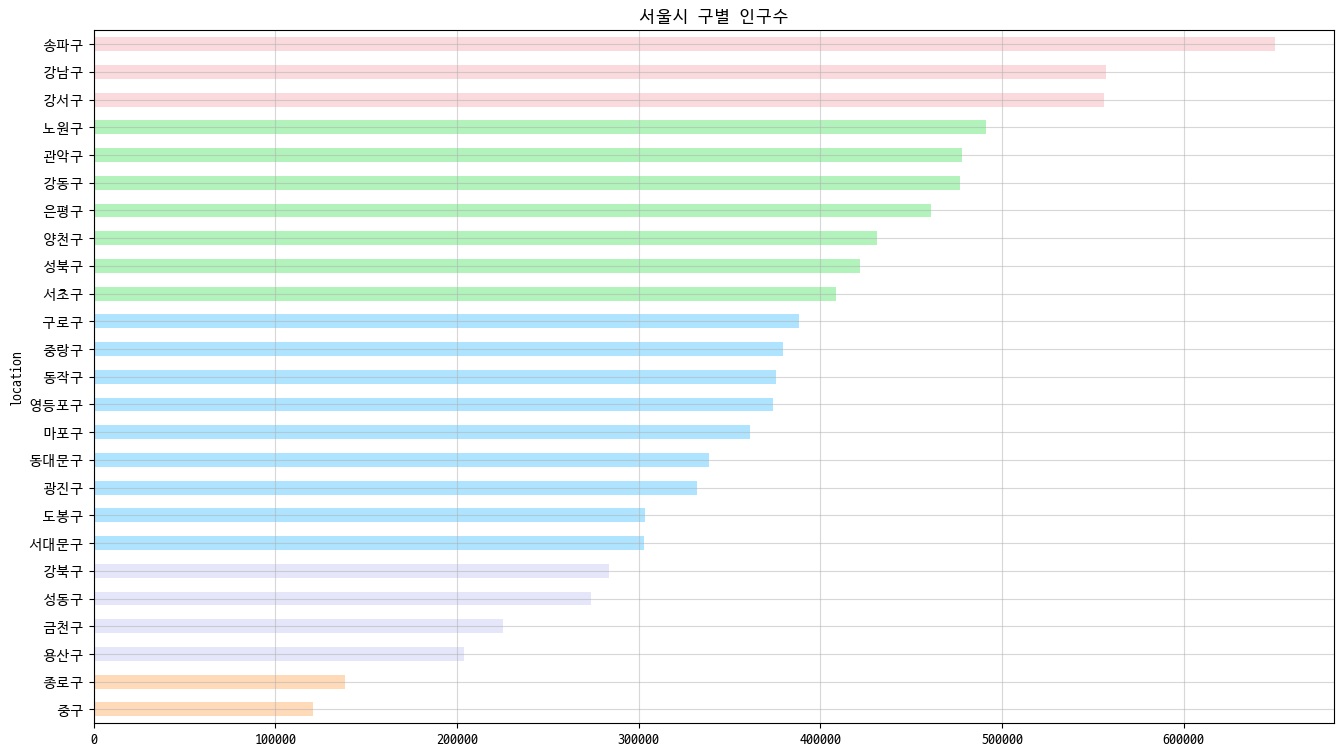

In [41]:
def popColor(population):
    if population >= 500000:
        return '#FADADD'
    elif population >= 400000:
        return '#B2F2BB'
    elif population >= 300000:
        return '#AEE4FF'
    elif population >= 200000:
        return '#E6E6FA'
    else:
        return '#FFDAB9'

total_data['color'] = total_data['population'].apply(popColor)
total_data= total_data.sort_values(by = 'population', ascending = True)
    
total_data['population'].plot(kind = "barh", figsize = (16,9), color = total_data['color'])
plt.title('서울시 구별 인구수')
plt.grid(alpha = 0.5)
plt.show()

In [59]:
def CCTVColor(CCTV):
    if CCTV >= 6000:
        return '#FADADD'
    elif CCTV >= 5000:
        return '#B2F2BB'
    elif CCTV >= 4000:
        return '#AEE4FF'
    elif CCTV >= 3000:
        return '#E6E6FA'
    else:
        return '#FFDAB9'

total_data['color'] = total_data['CCTV'].apply(CCTVColor)
total_data= total_data.sort_values(by = 'CCTV', ascending = True)
# total_data['color']

total_data['CCTV'].sort_values().plot(kind = "barh", figsize = (16,9), color = total_data['color'])
plt.title('서울시 구별 CCTV 갯수')
plt.grid(alpha = 0.5)
plt.show()

location
종로구     #FFDAB9
중구      #FFDAB9
도봉구     #FFDAB9
용산구     #E6E6FA
금천구     #E6E6FA
동작구     #E6E6FA
강북구     #E6E6FA
서대문구    #E6E6FA
동대문구    #E6E6FA
마포구     #E6E6FA
노원구     #E6E6FA
강서구     #E6E6FA
서초구     #E6E6FA
송파구     #AEE4FF
성동구     #AEE4FF
강동구     #AEE4FF
광진구     #AEE4FF
양천구     #AEE4FF
성북구     #AEE4FF
영등포구    #AEE4FF
관악구     #AEE4FF
구로구     #AEE4FF
중랑구     #B2F2BB
은평구     #B2F2BB
강남구     #FADADD
Name: color, dtype: object

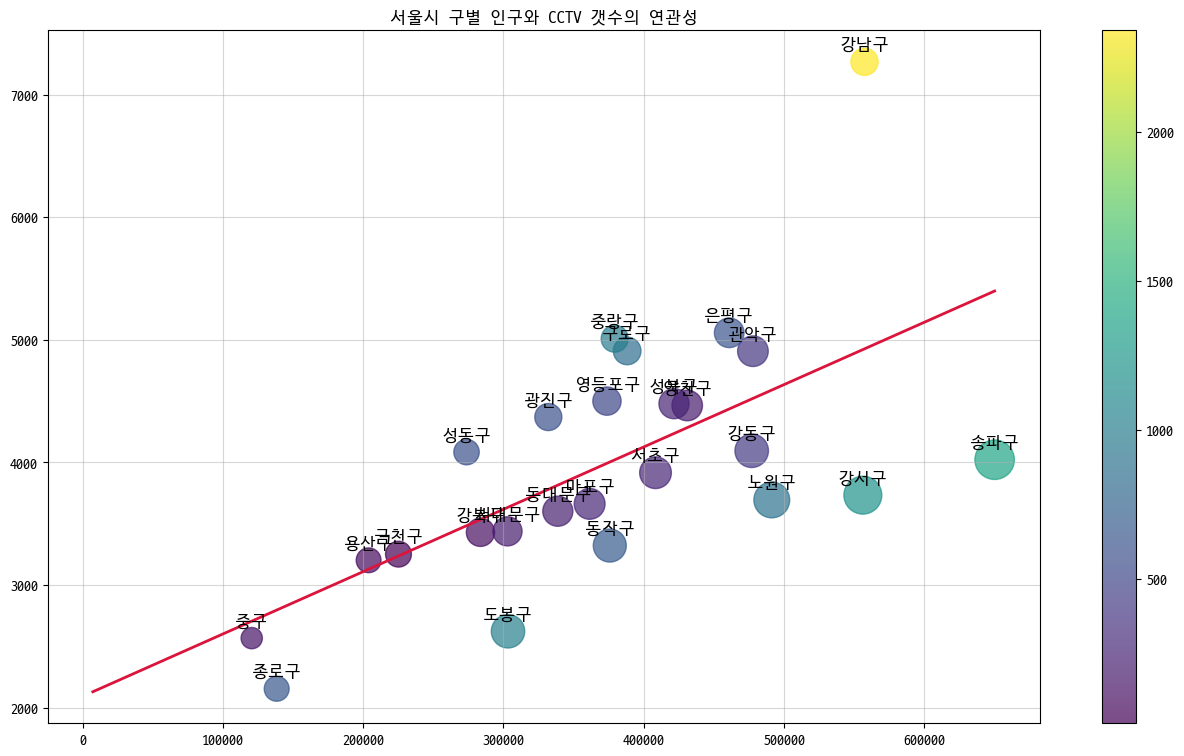

In [43]:
total_data['CCTV'] = pd.to_numeric(total_data['CCTV'], errors='coerce')

fp1 = np.polyfit(total_data['population'],total_data['CCTV'], 1)
f1 = np.poly1d(fp1)
fx = np.linspace(7267,650110,10)

total_data['err'] = np.abs(total_data['CCTV'] - f1(total_data['population'])) # 오차
size = (total_data['population'] / total_data['CCTV']).astype(float)
color = np.random.randint(0,25, size = len(total_data))

plt.figure(figsize = (16,9))
plt.scatter(total_data['population'],total_data['CCTV'], s = size * 5, c = total_data['err'], alpha = 0.7)
plt.plot(fx,f1(fx), lw = 2, color = '#DC143C')
for n in range(len(total_data['population'])):
    plt.text(total_data['population'][n],total_data['CCTV'][n] + 100,total_data.index[n], fontsize = 12, ha = 'center')
    
plt.title('서울시 구별 인구와 CCTV 갯수의 연관성')

plt.grid(alpha = 0.5)
plt.colorbar()
plt.show()

In [44]:
cri_raw = pd.read_csv('dataset/경찰청범죄 발생지역별통계20231231.csv', encoding = "EUC-KR")
cri_data = cri_raw.loc[:,:'서울강동구']
# Transpose (열과 행 바꾸기)
cri_data = cri_data.transpose()
cri_data['total'] = 0

for i in range(len(cri_data[2:])):
    cri_data[2:]['total'].iloc[i] = cri_data[2:].iloc[i].sum()
    
cri_data = cri_data.reset_index()
cri_data = cri_data[['index','total']][2:].reset_index(drop = True)
cri_data.columns = ['location','total']
cri_data['location'] = cri_data['location'].str.replace('서울','')
cri_data = cri_data.set_index('location')
cri_data['total'] = cri_data['total'].astype(int)
cri_data

,total
location,
종로구,9223
중구,9793
용산구,9042
성동구,7367
광진구,9688
동대문구,9885
중랑구,9536
성북구,8130
강북구,8048


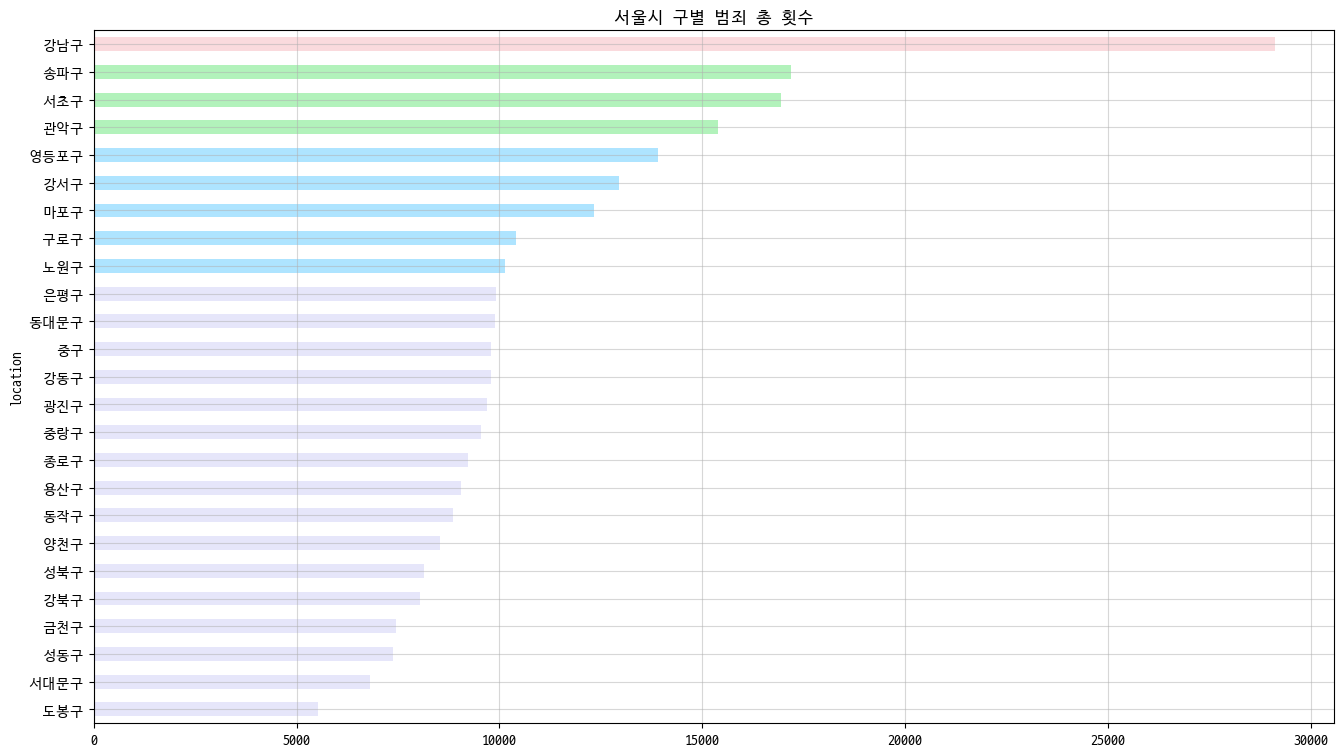

In [66]:
def criColor(cri):
    if cri >= 20000:
        return '#FADADD'
    elif cri >= 15000:
        return '#B2F2BB'
    elif cri >= 10000:
        return '#AEE4FF'
    elif cri >= 5000:
        return '#E6E6FA'
    else:
        return '#FFDAB9'

cri_data = cri_data.sort_values(by = 'total', ascending = True)
cri_data['color'] = cri_data['total'].apply(criColor)
cri_data['color']
# cri_data

cri_data['total'].plot(kind = 'barh', figsize = (16,9), color = cri_data['color'])
plt.grid(alpha = 0.5)
plt.title('서울시 구별 범죄 총 횟수')
plt.show()

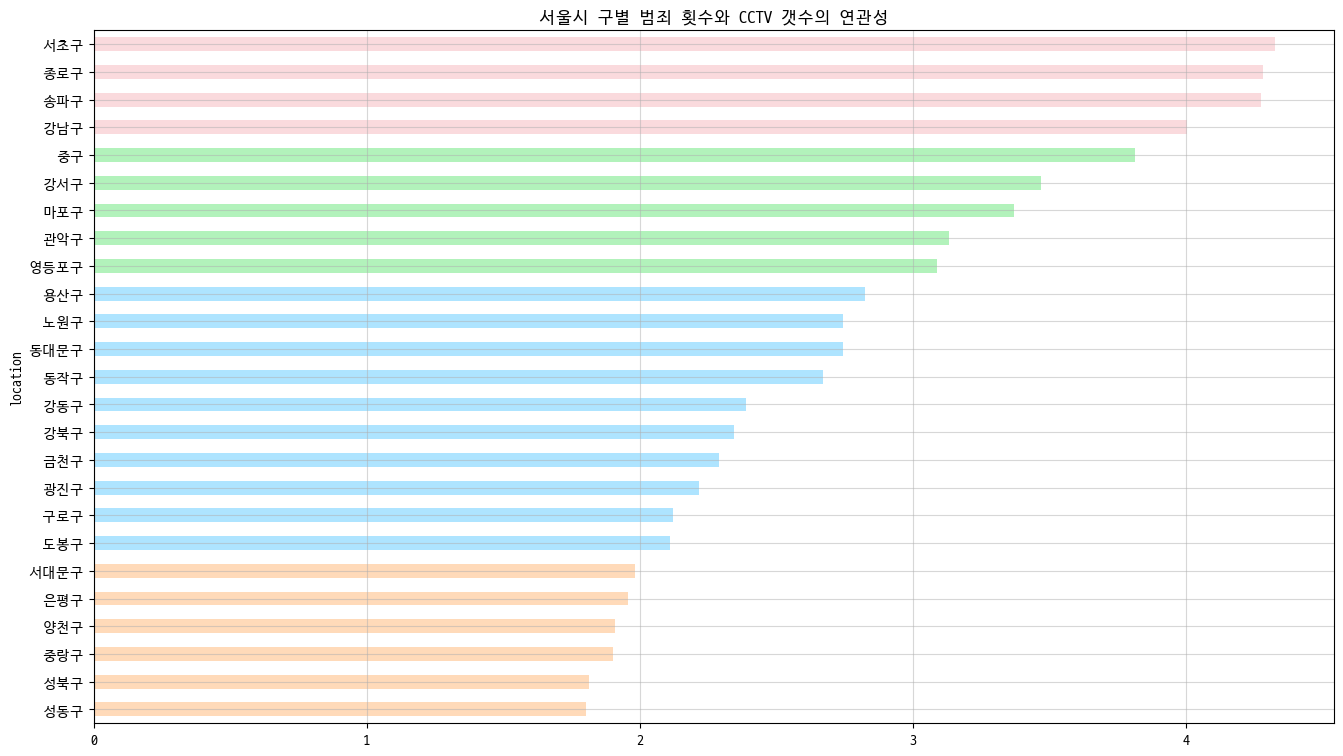

In [46]:
total_data = total_data.sort_values(by = 'location')
cri_data =cri_data.sort_values(by = 'location')

def rateColor(rate):
    if rate >= 4:
        return '#FADADD'
    elif rate >= 3:
        return '#B2F2BB'
    elif rate >= 2:
        return '#AEE4FF'
    else:
        return '#FFDAB9'

rate = cri_data['total'] / total_data['CCTV']
rate = rate.sort_values()
rate_color = rate.apply(rateColor)
rate.plot(kind = 'barh', figsize = (16,9), color = rate_color)
plt.title('서울시 구별 범죄 횟수와 CCTV 갯수의 연관성')
plt.grid(alpha = 0.5)
plt.show()